# Model to Predict Water Potability - 2nd part
## Exploratory Data Analysis - EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

water_df = pd.read_csv("data/clean_dataset.csv")
display(water_df.head())
print(water_df.info())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,368.516441,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,368.516441,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


First let's check how balanced is our data.

0    1998
1    1278
Name: Potability, dtype: int64


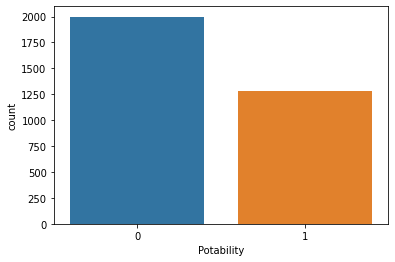

In [8]:
print(water_df["Potability"].value_counts())
sns.countplot(x="Potability", data=water_df)
plt.show()

In [12]:
print(f"Potable water data percentaje: {1278/water_df.shape[0]*100:.2f}%")
print(f"Non-potable water data percentaje: {1998/water_df.shape[0]*100:.2f}%")

Potable water data percentaje: 39.01%
Non-potable water data percentaje: 60.99%


**Observation:** We have mild imbalanced data; as we can see, only 39.01% of our data is for potable water, which may cause problems when we train our model.

Knowing the ratio for our classes, let's make some multi-variate analysis.

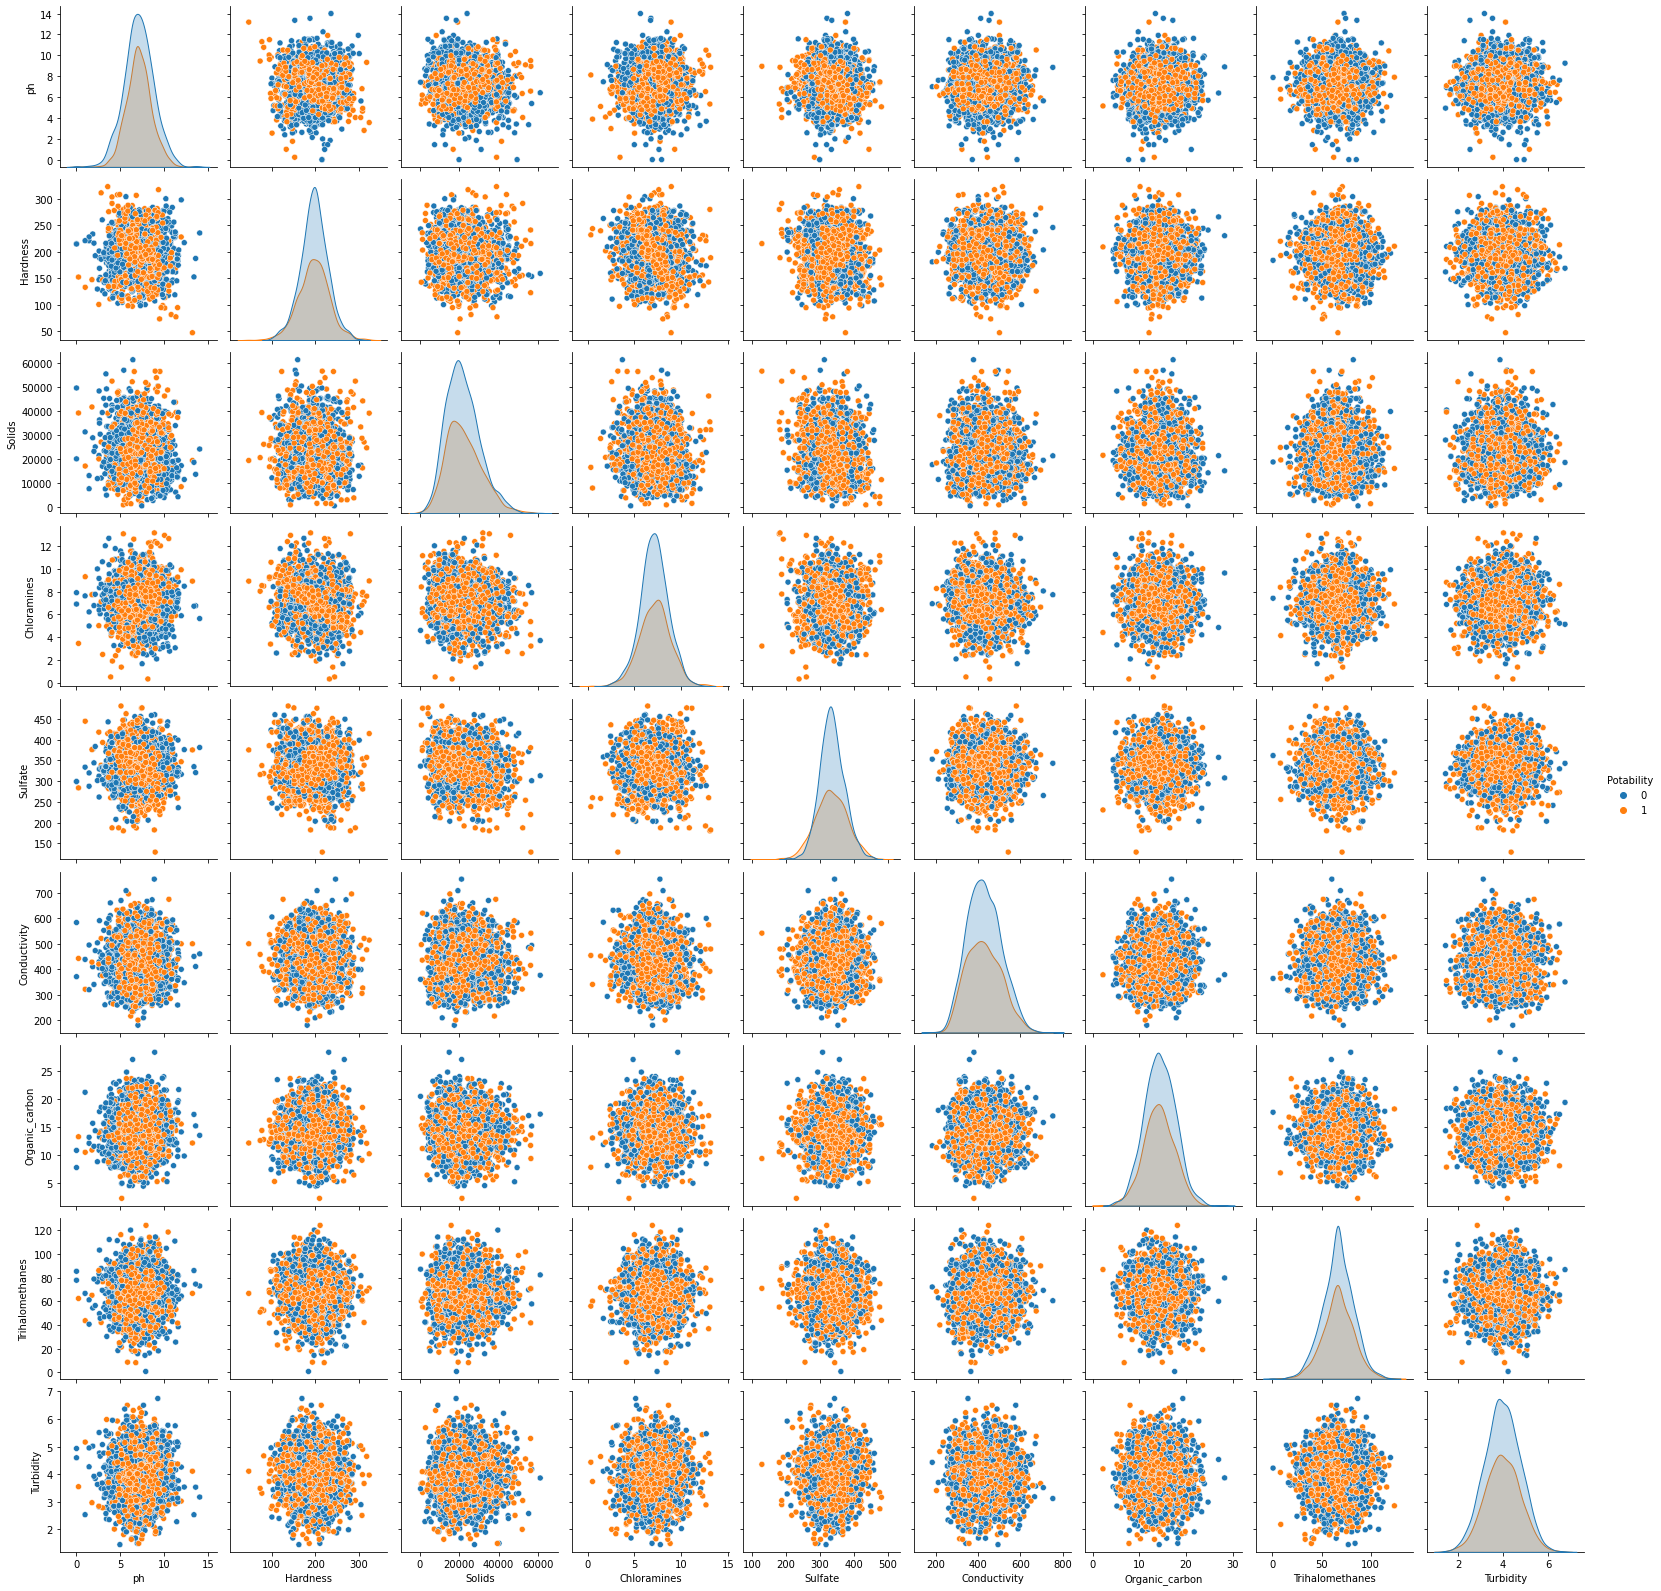

In [14]:
sns.pairplot(data=water_df, hue="Potability")
plt.show()

**Observation:** The data is really spread between classes, which probably means that we won't use a linear classifier for our model.

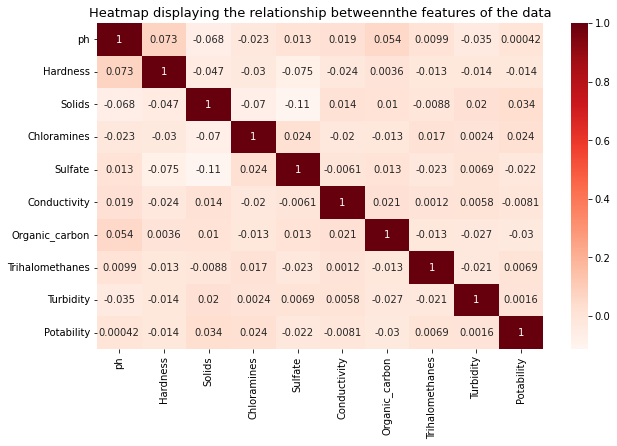

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(water_df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

**Observation:** As expected (Based on the pairplot), the correlation between our variables is low. We have negative and positive correlations, but the majority didn't reach 0.1 of correlation.

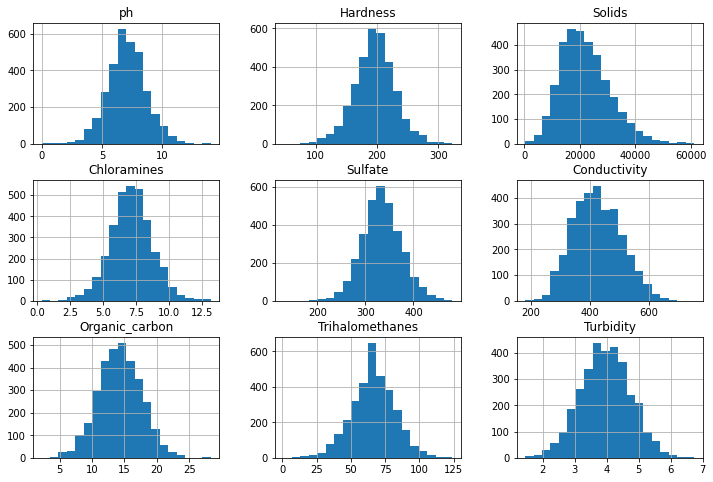

In [17]:
water_df.drop(["Potability"], axis=1).hist(figsize=(12,8),bins=20)
plt.show()

**Observation:** Most of the features are similar to a normal distribution, except for Solids which is slightly tilted to the left.

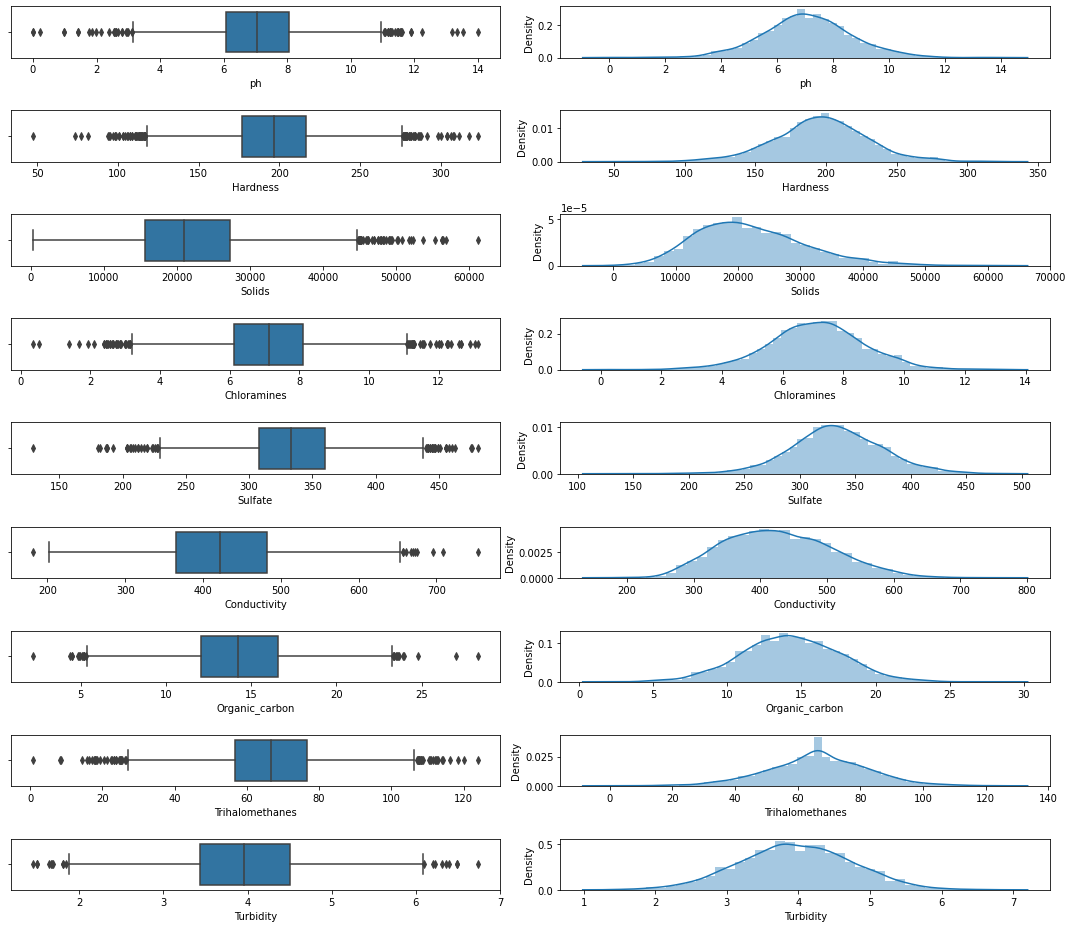

In [33]:
%%capture --no-display

fig, ax = plt.subplots(9, 2, figsize = (15, 13))
for idx, col in enumerate(water_df.drop(["Potability"], axis=1).columns.to_list()):
    sns.boxplot(x=col, data=water_df, ax=ax[idx, 0])
    sns.distplot(water_df[col], ax=ax[idx, 1])
plt.tight_layout()
#fig.suptitle("Box plot and data density to check distribution and outliers")
plt.show()

**Observation:** We have some outliers on each feature, and the data distribution has more than one feature tilted to the left.

### Conclusions

- The features don't have a linear correlation between them, so we can't use a linear classifier to separate our classes.
- All the features have multiple outliers; we need an algorithm non-sensible to these values.
- The dataset is mildly imbalanced; before training the model, we must preprocess the data and balance it.